# BellMan Ford

The bellman-Ford algorithm helps to find the shortest distance from the source node to all other nodes. But, we have already learned Dijkstra's algorithm (Dijkstra's algorithm article link) to fulfill the same purpose. Now, the question is how this algorithm is different from Dijkstra's algorithm.

While learning Dijkstra's algorithm, we came across the following two situations, where Dijkstra's algorithm failed:

If the graph contains negative edges.
If the graph has a negative cycle (In this case Dijkstra's algorithm fails to minimize the distance, keeps on running, and goes into an infinite loop. As a result it gives TLE error).
Negative Cycle: A cycle is called a negative cycle if the sum of all its weights becomes negative. The following illustration is an example of a negative cycle:



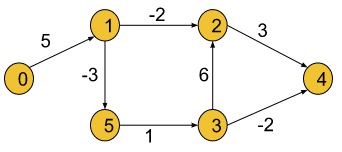

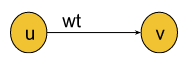


Let’s understand what the relaxation of edges means using an example.


Let's consider the above graph with dist[u], dist[v], and wt. Here, wt is the weight of the edge and dist[u] signifies the shortest distance to reach node u found until now. Similarly, dist[v](maybe infinite) signifies the shortest distance to reach node v found until now. If the distance to reach v through u(i.e. dist[u] + wt) is smaller than dist[v], we will update the value of dist[v] with (dist[u] + wt). This process of updating the distance is called the relaxation of edges.

We will apply the above process(i.e. minimizing the distance to reach every node) N-1 times in the Bellman-Ford algorithm.ithm.

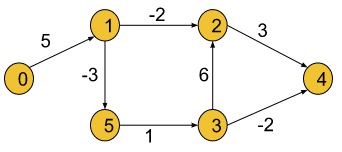

In [2]:
def bellmanford(V,edges,S):
    d=[float('inf')]*V
    d[S] =0
    for _ in range(V - 1):
        for u,v,wt in edges:
            if d[u]!=float('inf') and d[u]+wt<d[v]:
                d[v] = d[u] + wt

# Check for negative-weight cycles.
    for u, v, wt in edges:
        if d[u]!=float('inf') and d[u]+wt<d[v]:
            return [-1]

    return d
if __name__ == "__main__":
    V = 6
    S = 0
    edges = [
        [3, 2, 6],
        [5, 3, 1],
        [0, 1, 5],
        [1, 5, -3],
        [1, 2, -2],
        [3, 4, -2],
        [2, 4, 3]
    ]
    d=bellmanford(V,edges,S)
    #print(" ".join(map(str,d)))
    print(d)

[0, 5, 3, 3, 1, 2]


In [1]:
g = [
  [0,6,4,5,False,False],
  [False,0,False,False,-1,False],
  [False,-2,0,False,3,False],
  [False,False,-2,0,False,-1],
  [False,False,False,False,0,3],
  [False,False,False,False,False,0],
]
nodes = ['A','B','C','D','E','F']
node_ind = {nodes[i] :i for i in range(len(nodes))}

edg_list = []
for i in range(len(g)):
  for j in range(len(g[i])):
    if g[i][j] != False and g[i][j] !=0:
      edg_list.append((nodes[i],nodes[j]))
# print(edg_list)

d = {node: float('inf') for node in nodes}
d['A']=0

for i in range(len(g) -1 ):
  for u,v in edg_list:
    u_ind = node_ind[u]
    v_ind = node_ind[v]
    nd = d[u] + g[u_ind][v_ind]
    if d[v] > nd:
      d[v]= nd
print(d)

{'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 0, 'F': 3}
